In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

#### Computing the probability of bigram with a text of around 50 000 words and the frequency of letters in french langage

There is 54584 words


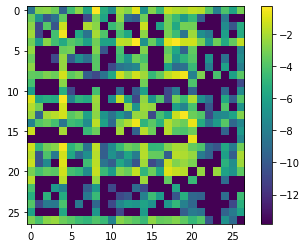

In [2]:
alphabet = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

freq = [4,0,8,18,13,17,19,14,11,20,3,2,12,15,6,1,21,7,5,16,24,23,9,10,22,25] #EAI...


prob_matrix = np.zeros((27,27))
file = open('data.txt', "r")
n = 0
for line in file:
    n +=1
    letter = ord(line[0])
    if (letter >= 97 and letter <= 122):
        letter = letter - 97
        prob_matrix[26,letter] +=1
    for i in range(len(line)-1):
        letter = ord(line[i])
        if (letter==10):
            letter=26
        if (letter >= 97 and letter <= 122):
            letter = letter - 97
        next_letter = ord(line[i+1])
        if (next_letter==10):
            next_letter=26
        if (next_letter >= 97 and next_letter <= 122):
            next_letter = next_letter - 97

        if (letter <= 26 and next_letter <= 26):
            prob_matrix[letter,next_letter] +=1
    
prob_matrix = np.log(prob_matrix/n + 0.000001)
file.close()
print("There is",n,"words")
plt.imshow(prob_matrix)
plt.colorbar()
plt.show()

#### Compute the Log plausibilty, it lives between -2 and -10, higher it is, better it is

In [4]:
def compute_plausibility(tab):
    plausibility = 0
    N = 0
    for i in range(len(tab)-1):
        N +=1
        #if tab[i] != 26 and tab[i+1] != 26:
        plausibility += prob_matrix[tab[i],tab[i+1]]
    return(plausibility/N)

def permutation(tab):
    res = copy.deepcopy(tab)
    u1 = random.randint(0,25)
    u2 = random.randint(0,25)
    while (u1 == u2):
        u2 = random.randint(0,25)
    res[u1] = tab[u2]
    res[u2] = tab[u1]
    return res

#### Converting string to int and the inverse operation

In [5]:
def string_to_int(sentence,state=alphabet):
    res =[]
    for i in range(len(sentence)):
        asc2 = ord(sentence[i])
        if asc2 == 32:
            res.append(26)
        else:
            res.append(state[asc2-97])
    return res

def int_to_string(sentence,state=alphabet):
    res =""
    for i in range(len(sentence)):
        if sentence[i] == 26:
            res +=" "
        else:
            res+= chr(state[sentence[i]]+97)
    return res

#### Crypting and decrypting sentence

In [6]:
def crypt_sentence(res,key):
    for i in range(len(res)):
        if res[i] != 26:
            res[i] = key[res[i]]
    return res

def decrypt_sentence(res,key):
    for i in range(len(res)):
        if res[i] == 26:
            res[i] = " "
        else:
            for j in range(26):
                if key[j] == res[i]:
                    res[i] = chr(j+97)
                    break
    return res

In [7]:
def decrypt_array(tab,key):
    res = []
    for i in range(len(tab)):
        if tab[i] == 26:
            res.append(26)
        else:
            for j in range(26):
                if key[j] == tab[i]:
                    res.append(j)
                    break
    return res

#### Compute the starting point by classic frequency analysis

In [8]:
def compute_init_sate(sentence):
    res = np.zeros(26)
    freq_here = np.zeros(26)
    n= 0
    for i in range(len(sentence)):
        letter = ord(sentence[i])
        if letter != 32:
            freq_here[letter-97]+=1
    for i in range(26):
        index = np.where(freq_here == freq_here.max())[0][0]
        res[index] = int(freq[i])
        freq_here[index]= -1
    return res

#### Metropolis Hasting algorithms

In [9]:
def MH(sentence,T=1,max_iter=500000,min_iter=200,treshold = -1.5):
    print("This is my crypted sentence :")
    print(sentence)
    N = len(sentence)
    
    tab_crypt = string_to_int(sentence)
    x0 = compute_init_sate(sentence)
    
    x0_try = decrypt_array(tab_crypt,x0)
    x0_plausibility = compute_plausibility(x0_try)
    
    best_score = x0_plausibility
    
    for i in range(max_iter):
        x_guess = permutation(x0)
        x_guess_try = decrypt_array(tab_crypt,x_guess)
        x_guess_plausibility = compute_plausibility(x_guess_try)

        R = np.exp((x_guess_plausibility-x0_plausibility)*N/T)
        
        if (x_guess_plausibility > best_score):
            print("For %d iterations the plausibility is %0.2f" %(i,x_guess_plausibility))
            print(int_to_string(x_guess_try))
            best_score = x_guess_plausibility
        
        U = random.uniform(0,1)
        if (U < R):
            x0 = x_guess
            x0_try=x_guess_try
            x0_plausibility = x_guess_plausibility

    print("The key is :")
    for i in range(len(x0)):
        print(chr(int(alphabet[i]+65)),":",chr(int(x0[i]+65)))
    print(int_to_string(x0_try))
    return(int_to_string(x0_try))

## 1st example

In [10]:
#This is they key
key = np.random.permutation(26)
print(key)

[24  2 21 12 22  0 14 17 10 16 25 11  9  6  1  7  5 13 19 20  4  3 15  8
 18 23]


In [11]:
test= "je suis le plus grand de ma classe et mon sac a dos est bleu"
test_int = string_to_int(test)
crypt_array = crypt_sentence(test_int,key)
crypt_test = int_to_string(crypt_array)
print(test)
print(crypt_test)
decrypt_test = decrypt_sentence(crypt_array,key)
print(str(decrypt_test))

je suis le plus grand de ma classe et mon sac a dos est bleu
qw tekt lw hlet onygm mw jy vlyttw wu jbg tyv y mbt wtu clwe
['j', 'e', ' ', 's', 'u', 'i', 's', ' ', 'l', 'e', ' ', 'p', 'l', 'u', 's', ' ', 'g', 'r', 'a', 'n', 'd', ' ', 'd', 'e', ' ', 'm', 'a', ' ', 'c', 'l', 'a', 's', 's', 'e', ' ', 'e', 't', ' ', 'm', 'o', 'n', ' ', 's', 'a', 'c', ' ', 'a', ' ', 'd', 'o', 's', ' ', 'e', 's', 't', ' ', 'b', 'l', 'e', 'u']


In [12]:
MH(crypt_test)

This is my crypted sentence :
qw tekt lw hlet onygm mw jy vlyttw wu jbg tyv y mbt wtu clwe
For 0 iterations the plausibility is -6.80
fq btsb jq ajtb geinh hq ri xjibbq qu ron bix i hob qbu cjqt
For 1 iterations the plausibility is -6.77
fq btsb jq ajtb geinh hq ri kjibbq qu ron bik i hob qbu cjqt
For 3 iterations the plausibility is -5.75
fu btsb ju ajtb geinh hu ri kjibbu uq ron bik i hob ubq cjut
For 5 iterations the plausibility is -5.58
fu btsb ju ajtb gkinh hu ri ejibbu uq ron bie i hob ubq cjut
For 12 iterations the plausibility is -4.49
fu ltsl ju ajtl gkinh hu ri ejillu uq ron lie i hol ulq cjut
For 13 iterations the plausibility is -4.43
fu ltsl ju ajtl gkinm mu ri ejillu uq ron lie i mol ulq cjut
For 25 iterations the plausibility is -4.22
fu lasl ju tjal gkinm mu ri ejillu uq ron lie i mol ulq cjua
For 26 iterations the plausibility is -4.21
fu lasl ju tjal ykinm mu ri ejillu uq ron lie i mol ulq cjua
For 32 iterations the plausibility is -4.02
fu lasl vu tval ykinm mu ri e

'me rivr ue duir lhanc ce pa suarre et pon ras a cor ert quei'

### 2nd example gifted by my mother

In [ ]:
phrase_maman = "w qsihs jikg ui kmhs ecmkq ui umkq waddq mk rahks gmc mk h"
MH(phrase_maman)

The answer is "C'etait dans la nuit brune la lune comme un point sur un i"

### 3rd example Evin

In [16]:
phrase_Evin = "os tmaom wft ygol wft dtkuwtn jwo lt hktfaom hgwk wft eiohgsama"

In [17]:
MH(phrase_Evin)

This is my crypted sentence :
os tmaom wft ygol wft dtkuwtn jwo lt hktfaom hgwk wft eiohgsama
For 0 iterations the plausibility is -8.57
ha gejhe xbg pohk xbg sgvlxgf rxh kg yvgbjhe yoxv xbg twhyoajej
For 2 iterations the plausibility is -8.46
ha gejhe xbg pohk xbg sgvlxgf rxh kg yvgbjhe yoxv xbg dwhyoajej
For 6 iterations the plausibility is -8.34
hl gejhe xbg pohk xbg sgvaxgf rxh kg yvgbjhe yoxv xbg dwhyoljej
For 7 iterations the plausibility is -8.30
hl gejhe xbg pohk xbg dgvaxgf rxh kg yvgbjhe yoxv xbg swhyoljej
For 11 iterations the plausibility is -8.29
hl gejhe xbg pohk xbg igvaxgf rxh kg yvgbjhe yoxv xbg swhyoljej
For 12 iterations the plausibility is -8.22
hl gejhe xbg pohk xbg igvaxgm rxh kg yvgbjhe yoxv xbg swhyoljej
For 14 iterations the plausibility is -8.07
hl gejhe xbg pohk xbg igvaxgm rxh kg yvgbjhe yoxv xbg suhyoljej
For 17 iterations the plausibility is -7.89
hl gejhe xbg pohu xbg igvaxgm rxh ug yvgbjhe yoxv xbg skhyoljej
For 18 iterations the plausibility is -7.77
xl

For 324935 iterations the plausibility is -2.15
in esois rme vait rme deugrex pri te luemois laru rme chilanoso
For 324963 iterations the plausibility is -2.15
in esois rme vait rme deubrex pri te luemois laru rme chilanoso
For 330197 iterations the plausibility is -2.13
in etait rse foil rse meuvrex pri le duesait doru rse chidonata
For 330500 iterations the plausibility is -2.12
in etait use voil use merduex fui le presait pour use chiponata
For 332348 iterations the plausibility is -2.12
in esais ure moit ure delquez fui te clerais coul ure phiconasa
For 332391 iterations the plausibility is -2.09
in esais ure moit ure delquez fui te plerais poul ure chiponasa
For 332587 iterations the plausibility is -2.06
in etait ure voil ure desquem fui le pserait pous ure chiponata
For 335134 iterations the plausibility is -2.06
in etait ure joil ure mesquex dui le pserait pous ure chiponata
For 335197 iterations the plausibility is -2.04
in etait ure foil ure mesquex dui le pserait pous ure ch

'in etait ure mois ure velquex dui se plerait poul ure chiponata'

The true sentence is "Il etait une fois une merguez qui se prenait pour une chipolata"

In [13]:
phrase_josephine = "nl mkhfh vkcnfl t kth mvft rdlt xkt wfpkht        rkmnft j kth xal vkmdt wduavft"

In [14]:
MH(phrase_josephine)

This is my crypted sentence :
nl mkhfh vkcnfl t kth mvft rdlt xkt wfpkht        rkmnft j kth xal vkmdt wduavft
For 0 iterations the plausibility is -7.96
ln xsbeb uswlen v svb xuev mrnv osv yeksbv        msxlev q svb ocn usxrv yracuev
For 6 iterations the plausibility is -6.84
vn xsbeb uswven l slb xuel mrnl osl yeksbl        msxvel q slb ocn usxrl yracuel
For 7 iterations the plausibility is -6.45
xn vsbeb uswxen l slb vuel mrnl osl yeksbl        msvxel q slb ocn usvrl yracuel
For 12 iterations the plausibility is -6.42
xn vsbeb ushxen l slb vuel mrnl osl yeksbl        msvxel q slb ocn usvrl yracuel
For 13 iterations the plausibility is -6.40
on vsbeb ushoen l slb vuel mrnl xsl yeksbl        msvoel q slb xcn usvrl yracuel
For 14 iterations the plausibility is -6.33
on msbeb ushoen l slb muel vrnl xsl yeksbl        vsmoel q slb xcn usmrl yracuel
For 15 iterations the plausibility is -6.06
on msbeb ushoen l slb muel vanl xsl yeksbl        vsmoel q slb xcn usmal yarcuel
For 19 iterations

The key is :
A : D
B : Z
C : C
D : V
E : K
F : W
G : U
H : J
I : F
J : O
K : E
L : P
M : R
N : L
O : A
P : X
Q : Q
R : M
S : T
T : H
U : N
V : S
W : Y
X : B
Y : I
Z : G
un retit decuin s est rdis mans pes filets        meruis h est pon deras fagodis


'un retit decuin s est rdis mans pes filets        meruis h est pon deras fagodis'

Un petit requin s'est pris dans mes filets. depuis c'est mon repas favoris

In [28]:
phrase_josephine2 = "ea whzreaoazg zhlgqwza mq wadquz ang ceqn dqa ea jwqug oiguzie man gwibiqk"

In [30]:
MH(phrase_josephine2)

This is my crypted sentence :
ea whzreaoazg zhlgqwza mq wadquz ang ceqn dqa ea jwqug oiguzie man gwibiqk
For 2 iterations the plausibility is -8.12
aq xgywaqnqyc ygucfxyq of xqhfdy qec mafe hfq aq txfdc nlcdyla oqe cxljlfv
For 3 iterations the plausibility is -8.07
aq xgywaqnqyc ygucfxyq sf xqhfdy qec mafe hfq aq txfdc nlcdyla sqe cxljlfv
For 5 iterations the plausibility is -7.93
aq xgywaqnqyc yguckxyq sk xqhkdy qec make hkq aq txkdc nlcdyla sqe cxljlkv
For 6 iterations the plausibility is -7.77
aq zgywaqnqyc yguckzyq sk zqhkdy qec make hkq aq tzkdc nlcdyla sqe czljlkv
For 9 iterations the plausibility is -7.19
aq zguwaqnquc ugyckzuq sk zqhkdu qec make hkq aq tzkdc nlcdula sqe czljlkv
For 11 iterations the plausibility is -7.16
aq gzuwaqnquc uzyckguq sk gqhkdu qec make hkq aq tgkdc nlcdula sqe cgljlkv
For 12 iterations the plausibility is -7.02
aq gzuwaqnquc uzyckguq sk gqhkdu qec make hkq aq igkdc nlcdula sqe cgljlkv
For 14 iterations the plausibility is -6.49
aq gzuwaqnquc uzycsguq 

For 4648 iterations the plausibility is -2.21
ue torguelers robsitre di temipr ens quin mie ue ctips lasprau den stavaif
For 15597 iterations the plausibility is -2.20
le turblemers ruysitre di tefior ens plin fie le ctios masoral den stavaiq
For 15667 iterations the plausibility is -2.19
le turblemers ruysitre di tefior ens plin fie le ctios masoral den stavaig
For 26558 iterations the plausibility is -2.18
le turglemers rubsitre di tefior ens plin fie le ctios masoral den stavaiq
For 110408 iterations the plausibility is -2.18
le porglecers roysipre di peuitr ens blin uie le mpits castral den spavaiq
For 110921 iterations the plausibility is -2.17
ue porquelers roysipre di pecitr ens fuin cie ue mpits lastrau den spavaix
For 110955 iterations the plausibility is -2.16
ue porquelers roysipre di pecitr ens fuin cie ue mpits lastrau den spavaig
For 111049 iterations the plausibility is -2.15
ue porquelers robsipre di pecitr ens fuin cie ue mpits lastrau den spavaig
For 111060 iterations

'le parbleters ragsupre du pequir ens clun que le mpuis tosirol den spofoux'

Le ronflement nocturne du requin est plus doux que le bruit des travaux

In [19]:
phrase_pauline = " na lxbl fdqua ai na txa qdffa oxqualla"
MH(phrase_pauline)

This is my crypted sentence :
 na lxbl fdqua ai na txa qdffa oxqualla
For 7 iterations the plausibility is -5.24
 il bshb moexl lf il nsl eomml usexlbbl
For 11 iterations the plausibility is -4.33
 ia bshb moexa af ia nsa eomma usexabba
For 15 iterations the plausibility is -4.11
 ia mshm boexa af ia nsa eobba usexamma
For 24 iterations the plausibility is -3.88
 ma ishi boexa af ma nsa eobba usexaiia
For 26 iterations the plausibility is -3.88
 ma ishi boexa az ma nsa eobba usexaiia
For 28 iterations the plausibility is -3.87
 mi asha boexi iz mi nsi eobbi usexiaai
For 29 iterations the plausibility is -3.62
 mi asha boexi it mi nsi eobbi usexiaai
For 31 iterations the plausibility is -3.56
 mi asha boefi it mi nsi eobbi usefiaai
For 37 iterations the plausibility is -3.53
 mi asha nolfi it mi bsi lonni uslfiaai
For 42 iterations the plausibility is -3.41
 mi aspa nolfi it mi bsi lonni uslfiaai
For 45 iterations the plausibility is -3.04
 mi aspa nolei it mi bsi lonni usleiaai
For 50 

' de rucr lanse et de que nalle junserre'